Use params:
- normal lid driven cavity as given but with grid size 200x200
- run with the job_abnahme.sh bash

In [1]:
node_numbers = [1,2,4,6,8,10,12,14,16]
# runtimes = [59.4092,30.4565,15.5956,11.7034,9.56912,8.53815,7.80668,6.56278,6.7467]
runtimes = [
    (1, 59.2713),
    (2, 30.4076),
    (4, 15.6721),
    (6, 11.8165),
    (8, 9.53527),
    (10, 8.39864),
    (12, 8.04772),
    (14, 6.58576),
    (16, 6.82769),
    (18, 6.61155),
    (20, 6.12908),
    (22, 5.46945),
    (24, 5.68283),
    (48, 4.09603),
]

runtimes_SOR = [215.28,119.162,68.8836,59.2007,49.1547,43.7086,42.3268] # SOR mit 100x100 gitter
node_numbers = [n for n, t in runtimes]
runtimes = [t for n, t in runtimes]

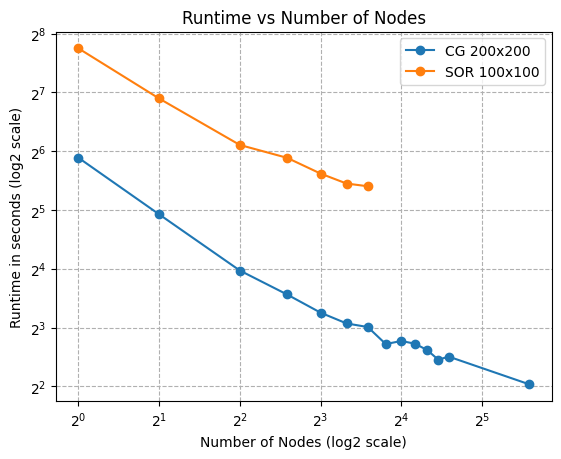

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(node_numbers, runtimes, marker='o', label="CG 200x200")
plt.plot(node_numbers[:7], runtimes_SOR, marker='o', label='SOR 100x100')
plt.yscale('log', base=2)
plt.xscale('log', base=2)
# linear regression in log-log space
# log_node_numbers = np.log2(node_numbers)
# log_runtimes = np.log2(runtimes)
# coefficients = np.polyfit(log_node_numbers, log_runtimes, 1)
# slope = coefficients[0]
# intercept = coefficients[1]
# plt.plot(node_numbers, 2**(intercept) * np.array(node_numbers)**slope, label=f'Fit: slope={slope:.2f}', linestyle='--')
plt.xlabel('Number of Nodes (log2 scale)')
plt.ylabel('Runtime in seconds (log2 scale)')
plt.title('Runtime vs Number of Nodes')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

### Speed up plot

/tmp/ipykernel_6404/3325401450.py:8: RuntimeWarning: invalid value encountered in divide
  s = (np.array(node_numbers) / np.array(speed_up) - 1) / (np.array(node_numbers) - 1)


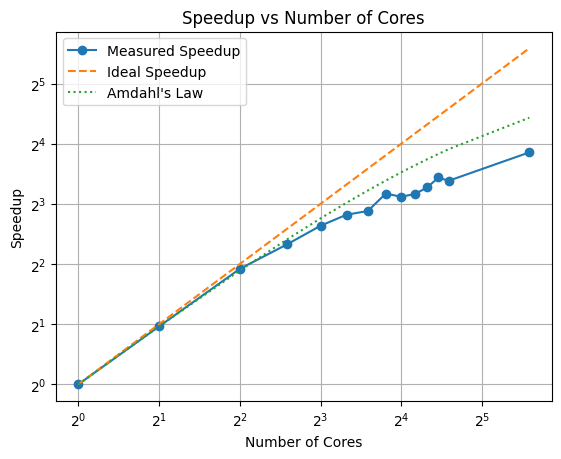

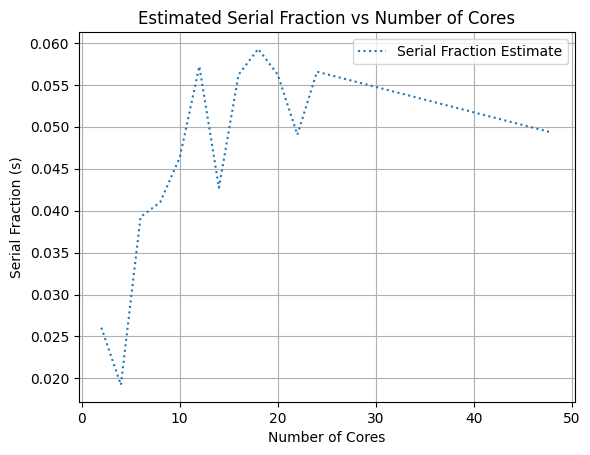

In [3]:
speed_up = runtimes[0] / np.array(runtimes)
plt.figure()
plt.plot(node_numbers, speed_up, marker='o', label='Measured Speedup')
plt.xscale('log', base=2)
plt.yscale('log', base=2)
plt.plot(node_numbers, node_numbers, label='Ideal Speedup', linestyle='--')
# Non parallel portion s (serial fraction)
s = (np.array(node_numbers) / np.array(speed_up) - 1) / (np.array(node_numbers) - 1)
# amdahls law
#approximate s with first serial fraction
amdahls_speedup = 1 / (s[1] + (1 - s[1]) / np.array(node_numbers))
plt.plot(node_numbers, amdahls_speedup, label="Amdahl's Law", linestyle=':')
plt.xlabel('Number of Cores')
plt.ylabel('Speedup')
plt.title('Speedup vs Number of Cores')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(node_numbers, s, label='Serial Fraction Estimate', linestyle=':')
plt.xlabel('Number of Cores')
plt.ylabel('Serial Fraction (s)')
plt.title('Estimated Serial Fraction vs Number of Cores')
plt.legend()
plt.grid(True)
plt.show()

### Parallel efficiency plot

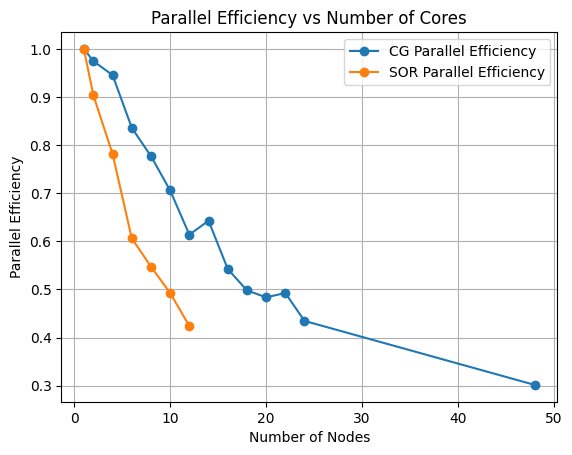

In [4]:
parallel_efficiency = speed_up / np.array(node_numbers)
parallel_efficiency_SOR = np.array(runtimes_SOR[0]) / (np.array(runtimes_SOR) * np.array(node_numbers[:7])) 
plt.figure()
plt.plot(node_numbers, parallel_efficiency, marker='o', label='CG Parallel Efficiency')
plt.plot(node_numbers[:7], parallel_efficiency_SOR, marker='o', label='SOR Parallel Efficiency')
plt.xlabel('Number of Nodes')
plt.ylabel('Parallel Efficiency')
plt.title('Parallel Efficiency vs Number of Cores')
plt.legend()
plt.grid(True)
plt.show()

3. How is the strong scaling of your program?

It is goooooooooood